In [39]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import newton

from utils import *

from ipywidgets import interact

import torch
from torch import nn
import torch.nn.functional as F

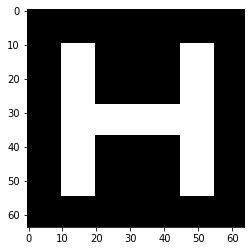

In [40]:
spread = [10,10]
size = 64
shape = (size, size)
pixels = shape[0] * shape[1]

x_true = build_x_true().reshape(-1,1)

plt.imshow(im(x_true, shape), cmap='Greys_r')

In [81]:
Q,H = arnoldi(x_true.reshape(shape)+1, n=10, q_0 = x_true.reshape(shape)[:,0].reshape(-1,1)+1)

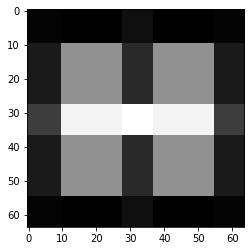

In [82]:
plt.imshow( (Q @ H @ Q[:,:-1].T) , cmap='Greys_r')

In [84]:
(H @ Q[:,:-1].T).shape

(11, 64)

In [49]:
class MatrixFactorization(torch.nn.Module):
    def __init__(self, rows, cols, n_factors=10):
        super().__init__()
        self.row_embedding = torch.nn.parameter.Parameter(torch.rand(rows, n_factors), requires_grad=True)
        self.col_embedding = torch.nn.parameter.Parameter(torch.rand(n_factors, cols), requires_grad=True)

    def forward(self):
        return torch.matmul( self.row_embedding, self.col_embedding )

In [50]:
mf = MatrixFactorization(64, 64, 10)

In [51]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(mf.parameters(), lr=0.001)

In [52]:
im_true = torch.Tensor(x_true.reshape(shape))

In [75]:
for epoch in range(1000):
    
    optimizer.zero_grad()

    output = mf.forward()
    loss = criterion(output,im_true)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(loss)

tensor(4.0156e-06, grad_fn=<MseLossBackward0>)
tensor(3.3632e-06, grad_fn=<MseLossBackward0>)
tensor(2.8058e-06, grad_fn=<MseLossBackward0>)
tensor(2.3311e-06, grad_fn=<MseLossBackward0>)
tensor(1.9282e-06, grad_fn=<MseLossBackward0>)
tensor(1.5875e-06, grad_fn=<MseLossBackward0>)
tensor(1.3006e-06, grad_fn=<MseLossBackward0>)
tensor(1.0600e-06, grad_fn=<MseLossBackward0>)
tensor(8.5913e-07, grad_fn=<MseLossBackward0>)
tensor(6.9230e-07, grad_fn=<MseLossBackward0>)


In [76]:
torch.linalg.norm((mf.row_embedding @ mf.col_embedding) - im_true)

tensor(0.0477, grad_fn=<CopyBackwards>)

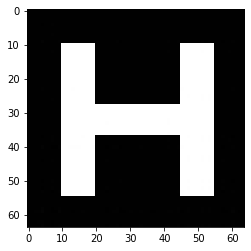

In [79]:
plt.imshow( (mf.row_embedding @ mf.col_embedding).detach().numpy() , cmap='Greys_r')